In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#studentennummer is: 1694955 
population = 55000000
contacts_per_day = 49
chance_infection = 0.09
transmission_coeff = chance_infection * (1/population) * contacts_per_day #CONSTANTEN STAAN OA HIER
duration = 65
step_size = 0.5
h = step_size
infectious_time = 5

i0 = 1e5
r0 = 1e6
e0 = 0
s0 = population - i0 - r0 - e0

beta = transmission_coeff

In [3]:
def seir_model(s0,e0,i0,r0,latency):
    latency_time = latency
    
    s = np.zeros(duration + 1)
    e = np.zeros(duration + 1)
    i = np.zeros(duration + 1)
    r = np.zeros(duration + 1)
    
    t = np.zeros(duration + 1)

    e[0] = e0
    i[0] = i0
    r[0] = r0
    s[0] = s0

    for step in range(duration):
        s2e = h * beta * s[step] * i[step]
        e2i = h / latency_time * e[step]
        i2r = h / infectious_time * i[step]

        s[step+1] = s[step] - s2e
        e[step+1] = e[step] + s2e - e2i
        i[step+1] = i[step] + e2i - i2r
        r[step+1] = r[step] + i2r
        
        t[step+1] = step

    return s, e, i, r, t

In [4]:
def plot_me(S, E, I, R, times):
    plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(times, S, '-b', label = "Susceptible")
    plt.plot(times, E, '-y', label = "Exposed")
    plt.plot(times, I, '-r', label = "Infected")
    plt.plot(times, R, '-g', label = "Recovered")
    
    plt.xlabel('Time in days')
    plt.ylabel('Population in millions')
    plt.legend()
    plt.show()

### A) Stel een SIR-model op voor jouw situatie. Laat duidelijk zien hoe de constanten zijn afgeleid.

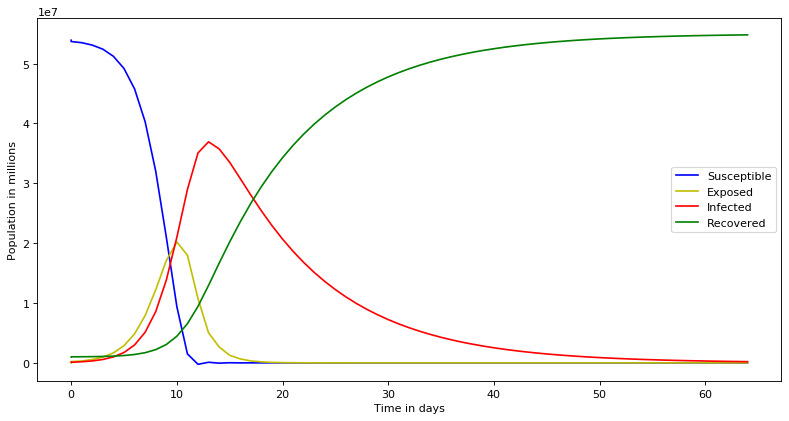

In [5]:
plot_me(*seir_model(s0,e0,i0,r0,1))

### B) Hoeveel mensen moeten gevaccineerd worden om een epidemie te voorkomen?

In [6]:
def calculate_vaccines():
    amount_vaccines = population - int((1 / infectious_time) / transmission_coeff)
    print(f"{amount_vaccines} people have to be vaccinated to prevend an epidemic")
    print(f"That is about {round(amount_vaccines / population * 100,2)}% of the population")
calculate_vaccines()

52505669 people have to be vaccinated to prevend an epidemic
That is about 95.46% of the population


### C) Introduceer een latency van twee dagen in je model en maak plots van het verloop van de ziekte in jouw populatie.

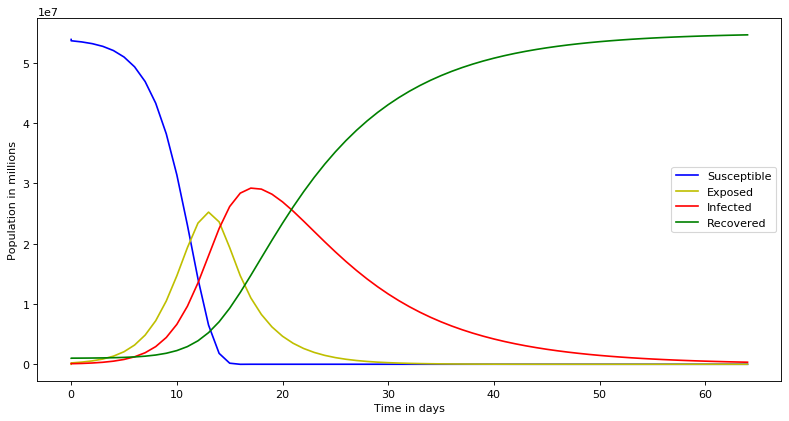

In [7]:
plot_me(*seir_model(s0,e0,i0,r0,2))